In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from valid_time_s import ajusta_df_time_s

import numpy as np
from tslearn.barycenters import dtw_barycenter_averaging
from valid_time_s import df_time_s_entrada, df_time_s_saida

from utils import *

from pathlib import Path

        Data         Empresa  Volume_Entrada
0    2017-01  11120590000102           0.000
1    2017-01  11766646000109           0.000
2    2017-01  12303919000133           0.000
3    2017-01  12368565000105          43.415
4    2017-01  13145134000142           0.000
..       ...             ...             ...
655  2017-12   8654540000109           0.000
656  2017-12   8943865000101           0.000
657  2017-12   9012335000102           0.000
658  2017-12   9334143000104          32.552
659  2017-12    976181000196           5.898

[660 rows x 3 columns]
Data             2017-01   2017-02   2017-03   2017-04  2017-05   2017-06  \
Empresa                                                                     
11120590000102    0.0000    6.0000    2.0100    1.1230   1.4843    0.6717   
11766646000109    0.0000    0.0000    0.0000    0.0000   0.0000    9.0600   
12303919000133    0.0000    0.0000    0.0000    0.0000   0.0000    0.0000   
12368565000105   43.4150    0.0000    0.0000    7.3

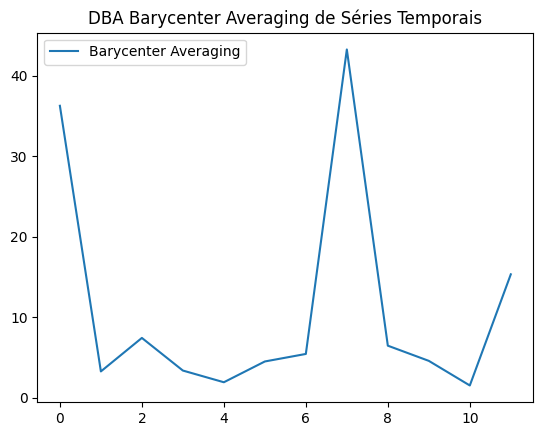

============================================================Olhando empresa: 20825514000193============================================================
oi
5475    0.0
5476    0.0
5477    0.0
5478    0.0
5479    0.0
       ... 
5835    0.0
5836    0.0
5837    0.0
5838    0.0
5839    0.0
Name: Volume_Entrada, Length: 365, dtype: float64


In [2]:
# Define datas como o mesmo formato: YYYY-MM-DD
def arruma_data(df):
    df["Data"] = df["Data"].dt.strftime(r'%Y-%m-%d')
    df['Data'] = pd.to_datetime(df['Data'])
    return df

# Nomes de todas as empresas
lista_empresas = list(df_time_s_entrada["Empresa"].unique())

df_mensal = arruma_data(df_time_s_entrada) # Agora o df_time_s_entrada ja vem com esse formato

# Agrupe por empresa e mês, somando os valores de entrada para cada mês
df_mensal = df_time_s_entrada.groupby([df_time_s_entrada['Data'].dt.to_period('M'), 'Empresa'])['Volume_Entrada'].sum().reset_index()

# Converta a coluna `Data` de volta para datetime para usar no pivoteamento
df_mensal['Data'] = df_mensal['Data'].astype(str)

# Pivoteando dataframe.
df_pivot = df_mensal.pivot(index='Empresa', columns='Data', values='Volume_Entrada')

# Colocando apenas os valore em uma matriz
entradas_matriz = df_pivot.values

print(df_mensal.head(1000))
print(df_pivot)

# Fazendo barycenter averaging
barycenter = dtw_barycenter_averaging(entradas_matriz)

# Plotando
plt.plot(barycenter, label="Barycenter Averaging")
plt.legend()
plt.title("DBA Barycenter Averaging de Séries Temporais")
plt.show()


nice_print(f"Olhando empresa: {20825514000193}")
print("oi")
print(df_time_s_entrada[df_time_s_entrada["Empresa"] == "20825514000193"]["Volume_Entrada"])